# Before you start :
   - These exercises are related to the Subsetting and Descriptive Stats lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - All datasets are provided in the `your-code` folder of this lab.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!

#### Import all the libraries that are necessary

In [1]:
# import libraries here
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Challenge 1

#### In this challenge we will use the `Temp_States.csv` file. 

#### First import it into a data frame called `temp`.

In [2]:
# your answer here
temp = pd.read_csv('Temp_States.csv')

#### Print `temp`

In [3]:
print(temp.shape)
temp

(7, 3)


,City,State,Temperature
0,NYC,New York,19.444444
1,Albany,New York,9.444444
2,Buffalo,New York,3.333333
3,Hartford,Connecticut,17.222222
4,Bridgeport,Connecticut,14.444444
5,Treton,New Jersey,22.222222
6,Newark,New Jersey,20.000000


#### Explore the data types of the Temp dataframe. What type of data do we have? Comment your result.

In [4]:
# your answer here
temp.dtypes
#We have two columns with objects, the objects can be categorical data or strings. The third columns has decimal number or float.

City            object
State           object
Temperature    float64
dtype: object

#### Select the rows where state is New York

In [5]:
# your answer here
NY = temp[temp['State'] == 'New York']
NY

,City,State,Temperature
0,NYC,New York,19.444444
1,Albany,New York,9.444444
2,Buffalo,New York,3.333333


#### What is the average of the temperature of cities in New York?

In [6]:
# your answer here
NY.Temperature.mean()

10.74074074074074

#### We want to know cities and states with Temperature above 15 degress Celcius

In [7]:
# your answer here
TempM15 = temp[['City','State']][temp['Temperature'] >= 15]
TempM15

,City,State
0,NYC,New York
3,Hartford,Connecticut
5,Treton,New Jersey
6,Newark,New Jersey


#### Now, return only the cities that have a temperature above 15 degress Celcius

In [8]:
# your answer here
CitiesTempM15 = temp[['City']][temp['Temperature'] >= 15]
CitiesTempM15

,City
0,NYC
3,Hartford
5,Treton
6,Newark


#### We want to know which cities have a temperature above 15 degrees Celcius and below 20 degrees Celcius

*Hint: First write the condition then select the rows.*

In [9]:
# your answer here
CitiesTempM15m20 = temp[['City']][(temp['Temperature'] >= 15) & (temp['Temperature'] <= 20) ]
CitiesTempM15m20

,City
0,NYC
3,Hartford
6,Newark


#### Find the mean and the standard deviation of the temperature of each state.

*Hint: Use functions from Data Manipulation lesson*

In [10]:
# your answer her
#Antes de aprender a hacer groupbye.

temp_stats = pd.DataFrame(columns = ['States','Mean','Std'])
states = temp['State'].unique().tolist()
for est in states:
    #print(est)
    new = pd.DataFrame(np.array([[est, temp[temp['State']== est].mean().to_list()[0],temp[temp['State']== est].std().to_list()[0]]]),columns = ['States','Mean','Std'])
    temp_stats = pd.concat([temp_stats,new],ignore_index=True)
temp_stats    

,States,Mean,Std
0,New York,10.74074074074074,8.133404168888054
1,Connecticut,15.833333333333332,1.9641855032959645
2,New Jersey,21.111111111111107,1.5713484026367692


In [11]:
#With groupby function.
Temperature_State = temp.groupby('State').agg({'Temperature': ['mean','std']})
Temperature_State

Temperature          
                   mean       std
State                            
Connecticut   15.833333  1.964186
New Jersey    21.111111  1.571348
New York      10.740741  8.133404

# Challenge 2

#### Load the `employee.csv` file into a DataFrame. Call the dataframe `employee`

In [12]:
# your answer here
employee = pd.read_csv('employee.csv')
employee

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
3,Sonia,HR,Bachelor,F,analyst,4,35
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
6,Carlos,IT,Master,M,VP,8,70
7,Pedro,IT,Phd,M,associate,7,60
8,Ana,HR,Master,F,VP,8,70


#### Explore the data types of the Temp dataframe. Comment your results

Five columns are object type, four of them are categorical and one conatins strings. Years and Salary columnes have integers. 

In [13]:
# your answer here
employee.dtypes
#Five columns are object type, four of them are categorical and one conatins strings. Years and Salary columnes have integers. 

Name          object
Department    object
Education     object
Gender        object
Title         object
Years          int64
Salary         int64
dtype: object

#### Show visually the frequency distribution (histogram) of the employee dataset. In few words describe these histograms?

The salary ar low  or hight. They don't report salaries between 40 to 50. Me maximun years of work is three year is a recent company.

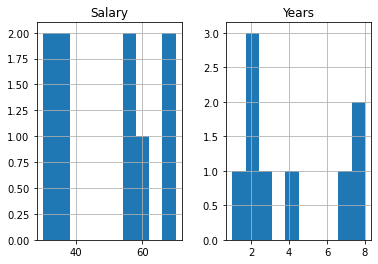

In [14]:
# your answer here
employee.hist();

#### What's the average salary in this company?

In [15]:
# your answer here
employee.Salary.mean()

48.888888888888886

#### What's the highest salary?

In [16]:
# your answer here
employee.Salary.max()

70

#### What's the lowest salary?

In [17]:
# your answer here
employee.Salary.min()

30

#### Who are the employees with the lowest salary?

In [18]:
# your answer here
employee['Name'][employee['Salary']== 30]

1    Maria
2    David
Name: Name, dtype: object

#### Could you give all the information about an employee called David?

In [19]:
# your answer here
employee[:][employee['Name']== 'David']

,Name,Department,Education,Gender,Title,Years,Salary
2,David,HR,Master,M,analyst,2,30


#### Could you give only David's salary?

In [20]:
# your answer here
employee[['Name','Salary']][employee['Name']== 'David']

,Name,Salary
2,David,30


#### Print all the rows where job title is associate

In [21]:
# your answer here
employee[employee['Title']== 'associate']

,Name,Department,Education,Gender,Title,Years,Salary
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
7,Pedro,IT,Phd,M,associate,7,60


#### Print the first 3 rows of your dataframe

##### Tip : There are 2 ways to do it. Do it both ways

In [22]:
# your answer here- 1 method
employee.head(3)

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


In [23]:
employee[:][:3]

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


In [24]:
# your answer here- 2nd method
employee.iloc[0:3,:]



,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


#### Find the employees who's title is associate and the salary above 55?

In [25]:
# your answer here
employee[(employee['Title']== 'associate') & (employee['Salary']>=55)]

,Name,Department,Education,Gender,Title,Years,Salary
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
7,Pedro,IT,Phd,M,associate,7,60


In [26]:
employee.dtypes

Name          object
Department    object
Education     object
Gender        object
Title         object
Years          int64
Salary         int64
dtype: object

#### Group the employees based on their number of years of employment. What are the average salaries in each group?

In [27]:
# your answer here
employee.groupby('Years').agg({'Salary': 'mean'})


,Salary
Years,
1,35.000000
2,38.333333
3,55.000000
4,35.000000
7,60.000000
8,70.000000


####  What is the average Salary per title?

In [28]:
# your answer here
salary_title = employee.groupby('Education').agg({'Salary': 'mean'})
salary_title

,Salary
Education,
Bachelor,41.666667
Master,51.000000
Phd,60.000000


#### Show a visual summary of the data using boxplot. What Are the First and Third Quartiles? Comment your results.
##### * Hint : Quantiles vs Quartiles*
##### - `In Probability and Statistics, quantiles are cut points dividing the range of a probability distribution into continuous intervals with equal probabilities. When division is into four parts the values of the variate corresponding to 25%, 50% and 75% of the total distribution are called quartiles.`

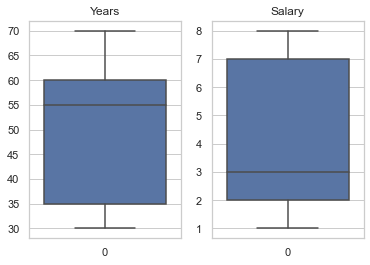

In [29]:
# draw boxplot here
sns.set_theme(style="whitegrid")
f, axes = plt.subplots(1,2)
#data = sns.load_dataset("salary_title")
axes[0] = sns.boxplot(data = employee['Salary'], orient = 'v', ax = axes[0])
axes[1] = sns.boxplot(data = employee['Years'], orient = 'v', ax = axes[1])
axes[0].set_title("Years")
axes[1].set_title("Salary") 
plt.show();

#plt.rcParams["figure.figsize"] = (4,4)


In [30]:
# print first quartile here
employee.Salary.quantile(0.25)

35.0

In [31]:
# print third quartile here
employee.Salary.quantile(0.5)

55.0

#### Is the mean salary per gender different?

In [32]:
# your answer here
employee.groupby('Gender').agg({'Salary': 'mean'})
#The means are diferents.

,Salary
Gender,
F,47.5
M,50.0


#### Find the minimum, mean and the maximum of all numeric columns for each Department.

##### Hint: Use functions from Data Manipulation lesson

In [33]:
# your answer here
pd.pivot_table(data = employee, index = 'Department', values = ['Years','Salary'] , aggfunc = [np.mean,np.min,np.max])
#pd.pivot_table(df,index=["Manager","Rep"],values=["Price"],aggfunc=[np.mean,len])

mean             amin         amax      
           Salary     Years Salary Years Salary Years
Department                                           
HR          45.00  4.666667     30     2     70     8
IT          48.75  4.500000     30     1     70     8
Sales       55.00  2.500000     55     2     55     3

### Bonus Question

#### For each department, compute the difference between the maximal salary and the minimal salary.

##### * Hint: try using `agg` or `apply` and `lambda`*

In [34]:
# your answer here

employee.groupby('Department').agg( Difference = ('Salary', lambda x: x.max()-x.min() ))
#'date': lambda x: max(x) - 1


,Difference
Department,
HR,40
IT,40
Sales,0


# Challenge 3

#### Open the Orders.csv dataset. Name your dataset orders

In [35]:
# your answer here
orders = pd.read_csv('./Orders.csv')
orders.head()

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
0,0,536365,85123A,2010,12,3,8,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,1,536365,71053,2010,12,3,8,white metal lantern,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,2,536365,84406B,2010,12,3,8,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,3,536365,84029G,2010,12,3,8,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,4,536365,84029E,2010,12,3,8,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


In [36]:
orders.shape

(397924, 14)

#### Explore your dataset by looking at the data types and the summary statistics. Comment your results

In [37]:
# your answer here
print('Shape',orders.shape)
orders.dtypes

Shape (397924, 14)


Unnamed: 0        int64
InvoiceNo         int64
StockCode        object
year              int64
month             int64
day               int64
hour              int64
Description      object
Quantity          int64
InvoiceDate      object
UnitPrice       float64
CustomerID        int64
Country          object
amount_spent    float64
dtype: object

In [38]:
# your answer here
orders.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,397924.0,278465.221859,152771.368303,0.0,148333.75,284907.50,410079.25,541908.00
InvoiceNo,397924.0,560617.126645,13106.167695,536365.0,549234.00,561893.00,572090.00,581587.00
year,397924.0,2010.934259,0.247829,2010.0,2011.00,2011.00,2011.00,2011.00
month,397924.0,7.612537,3.416527,1.0,5.00,8.00,11.00,12.00
day,397924.0,3.614555,1.928274,1.0,2.00,3.00,5.00,7.00
hour,397924.0,12.728247,2.273535,6.0,11.00,13.00,14.00,20.00
Quantity,397924.0,13.021823,180.420210,1.0,2.00,6.00,12.00,80995.00
UnitPrice,397924.0,3.116174,22.096788,0.0,1.25,1.95,3.75,8142.75
CustomerID,397924.0,15294.315171,1713.169877,12346.0,13969.00,15159.00,16795.00,18287.00
amount_spent,397924.0,22.394749,309.055588,0.0,4.68,11.80,19.80,168469.60


La base de datos contiene información sobre ventas realizadas.

Se tienen 14 columnas, la primera es una repetiión del índice. Hay 7 columna con enteros, 4 categóricas y  2 numéricas de decimales. Tres de las columnas con enteros tiene información de la fecha y una más con la hora, además de tener otra columna con la fecha de la compra. En promedio se compran 13 artículos, la cantidad máxima de compra de un artículo ha sido 80, 995.00 y la mínima es un lo cual es bastante razonable. El precio promedio por unidad es de 3.11 pesos con un mínimo de cero que puede ser n erro y un másimo de 8142. 75 pesos. En promedio se gasta 22.39 pesos por cada compra desglosada en la base de dato.s


In [39]:
orders.columns

Index(['Unnamed: 0', 'InvoiceNo', 'StockCode', 'year', 'month', 'day', 'hour',
       'Description', 'Quantity', 'InvoiceDate', 'UnitPrice', 'CustomerID',
       'Country', 'amount_spent'],
      dtype='object')

####  What is the average Purchase Price?

In [40]:
# your answer here
orders.drop('Unnamed: 0', axis = 1, inplace = True)

In [41]:
# Se agrupan los datos para juntar la información por factura y así saber los datos de las compras.
orders['UnitPrice'].mean() 

3.116174480549152

The average Purchase price is 3. 11 pesos

#### What were the highest and lowest purchase prices? 

In [42]:
# your answer here
print('The higest purchase prices is', orders['UnitPrice'].max() )

The higest purchase prices is 8142.75


In [43]:
# your answer here
print('The higest purchase prices is', orders['UnitPrice'].min() )

The higest purchase prices is 0.0


#### Select all the customers we have in Spain

In [44]:
# your answer here
CustomerSpain = orders[orders.Country == 'Spain']
CustomerSpain['CustomerID']

4250      12557
4251      12557
4252      12557
4253      12557
4254      12557
          ...  
394733    17097
394734    17097
394735    17097
394736    17097
394737    17097
Name: CustomerID, Length: 2485, dtype: int64

#### How many customers do we have in Spain?
##### Hint : Use value_counts()

In [45]:
# your answer here
len(CustomerSpain['CustomerID'].unique())

30

#### Select all the customers who have bought more than 50 items ?

In [46]:
# your answer here
orders_invoice = pd.pivot_table(data = orders, index = ['CustomerID','InvoiceNo'], values = ['Quantity',\
        'amount_spent'],aggfunc = {'Quantity':'sum','amount_spent':'sum'})
orders_invoiceM50 = orders_invoice[orders_invoice.Quantity > 50]
lista= []
for cust in orders_invoiceM50.index:
    lista.append(cust[0])
cust_M50 = set(lista)    
print(f'The customers who have bought more than 50 items are {len(cust_M50)}. The IDs are in  "cust_M50"')
orders_invoiceM50.head()

The customers who have bought more than 50 items are 4034. The IDs are in  "cust_M50"


Quantity  amount_spent
CustomerID InvoiceNo                        
12346      541431        74215      77183.60
12347      537626          319        711.79
           542237          315        475.39
           549222          483        636.25
           556201          196        382.52

#### Select orders from Spain that are above 50 items

In [47]:
# your answer here
CustomerSpain_m50 = orders[(orders.Country == 'Spain') & (orders.Quantity < 50)]
CustomerSpain_m50

,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
13974,538095,22504,2010,12,4,14,cabin bag vintage retrospot,1,2010-12-09 14:55:00,29.95,17097,Spain,29.95
13975,538095,22212,2010,12,4,14,four hook white lovebirds,1,2010-12-09 14:55:00,2.10,17097,Spain,2.10
13976,538095,22953,2010,12,4,14,birthday party cordon barrier tape,1,2010-12-09 14:55:00,1.25,17097,Spain,1.25
13977,538095,84818,2010,12,4,14,danish rose photo frame,1,2010-12-09 14:55:00,2.55,17097,Spain,2.55
13978,538095,21114,2010,12,4,14,lavender scented fabric heart,5,2010-12-09 14:55:00,1.25,17097,Spain,6.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...
394733,581193,23291,2011,12,3,17,dolly girl childrens cup,2,2011-12-07 17:05:00,1.25,17097,Spain,2.50
394734,581193,85232D,2011,12,3,17,set/3 decoupage stacking tins,1,2011-12-07 17:05:00,4.95,17097,Spain,4.95
394735,581193,22721,2011,12,3,17,set of 3 cake tins sketchbook,2,2011-12-07 17:05:00,1.95,17097,Spain,3.90
394736,581193,23241,2011,12,3,17,treasure tin gymkhana design,1,2011-12-07 17:05:00,2.08,17097,Spain,2.08


#### Select all free orders

In [48]:
# your answer here
freeOrders = orders[(orders.amount_spent == 0)]
len(freeOrders)
freeOrders.head()

,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
6914,537197,22841,2010,12,7,14,round cake tin vintage green,1,2010-12-05 14:02:00,0.0,12647,Germany,0.0
22539,539263,22580,2010,12,4,14,advent calendar gingham sack,4,2010-12-16 14:36:00,0.0,16560,United Kingdom,0.0
25379,539722,22423,2010,12,2,13,regency cakestand 3 tier,10,2010-12-21 13:45:00,0.0,14911,EIRE,0.0
29080,540372,22090,2011,1,4,16,paper bunting retrospot,24,2011-01-06 16:41:00,0.0,13081,United Kingdom,0.0
29082,540372,22553,2011,1,4,16,plasters in tin skulls,24,2011-01-06 16:41:00,0.0,13081,United Kingdom,0.0


#### Select all orders that are 'lunch bag'
#### Hint: Use string functions

In [57]:
# your answer here
lunch_bag = orders[orders.Description.str.contains('lunch bag')]
lunch_bag.InvoiceNo.unique()

array([536378, 536385, 536401, ..., 581538, 581581, 581583])

#### Select all orders that are made in 2011 and are 'lunch bag'  

In [58]:
# your answer here
lunch_bag_2011 = orders[orders.Description.str.contains('lunch bag')&(orders.year == 2011)]
lunch_bag_2011.head()

,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
26340,540015,20725,2011,1,2,11,lunch bag red retrospot,10,2011-01-04 11:40:00,1.65,13319,United Kingdom,16.50
26341,540015,20726,2011,1,2,11,lunch bag woodland,10,2011-01-04 11:40:00,1.65,13319,United Kingdom,16.50
26512,540023,22382,2011,1,2,12,lunch bag spaceboy design,2,2011-01-04 12:58:00,1.65,15039,United Kingdom,3.30
26513,540023,20726,2011,1,2,12,lunch bag woodland,1,2011-01-04 12:58:00,1.65,15039,United Kingdom,1.65
26860,540098,22384,2011,1,2,15,lunch bag pink polkadot,1,2011-01-04 15:50:00,1.65,16241,United Kingdom,1.65


#### Show the frequency distribution of the amount spent in Spain.

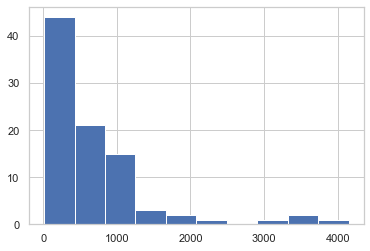

In [63]:
# your answer here
invoices_Spain = orders[orders.Country == 'Spain'].groupby("InvoiceNo",as_index=False).agg({"amount_spent":"sum"})
invoices_Spain.amount_spent.hist()

#### Select all orders made in the month of August

In [68]:
# your answer here
orders_August = orders[orders.month == 8]
orders_August['InvoiceNo'].unique()

array([561904, 561905, 561906, ..., 565014, 565056, 565067])

#### Select how many orders are made by countries in the month of August
##### Hint: Use value_counts()

In [69]:
# your answer here
orders_August.Country.value_counts()

United Kingdom     23105
Germany              795
EIRE                 593
France               569
Netherlands          280
Switzerland          267
Spain                252
Belgium              194
Israel               171
Channel Islands      140
Australia            107
Italy                 95
Austria               88
Norway                77
Finland               61
Malta                 55
Portugal              41
Sweden                40
Unspecified           23
Iceland               22
Poland                17
Denmark               16
Canada                 5
Name: Country, dtype: int64

#### What's the  average amount of money spent by country

In [54]:
# your answer here

#### What's the most expensive item?

In [71]:
# your answer here
most_expensive=orders[orders["UnitPrice"]==orders["UnitPrice"].max()]
most_expensive["Description"].iloc[0]

'postage'

#### What was the average amount spent per year ?

In [72]:
# your answer here
average_year=orders.groupby(["year"],as_index=False).agg({"amount_spent":"mean"})
average_year

,year,amount_spent
0,2010,21.892733
1,2011,22.430074
